In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_csv('mental_health.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (1259, 27)

First few rows:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
# Select relevant features
features = ['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere',
           'no_employees', 'remote_work', 'tech_company', 'benefits',
           'care_options', 'wellness_program', 'seek_help', 'treatment']

df_clean = df[features].copy()

# Handle missing values
df_clean['work_interfere'].fillna('NA', inplace=True)
df_clean['self_employed'].fillna('No', inplace=True)

# Simplify Gender categories
df_clean['Gender'] = df_clean['Gender'].apply(lambda x:
    'Male' if str(x).lower() in ['male', 'm']
    else ('Female' if str(x).lower() in ['female', 'f']
    else 'Other'))

# Convert categorical variables to numerical
le = LabelEncoder()
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

print("Processed data head:")
display(df_clean.head())

Processed data head:


,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,treatment
0,37,0,0,0,2,4,0,1,2,1,1,2,1
1,44,1,0,0,3,5,0,0,0,0,0,0,0
2,32,1,0,0,3,4,0,1,1,0,1,1,0
3,31,1,0,1,2,2,0,1,1,2,1,1,1
4,31,1,0,0,1,1,1,1,2,0,0,0,0


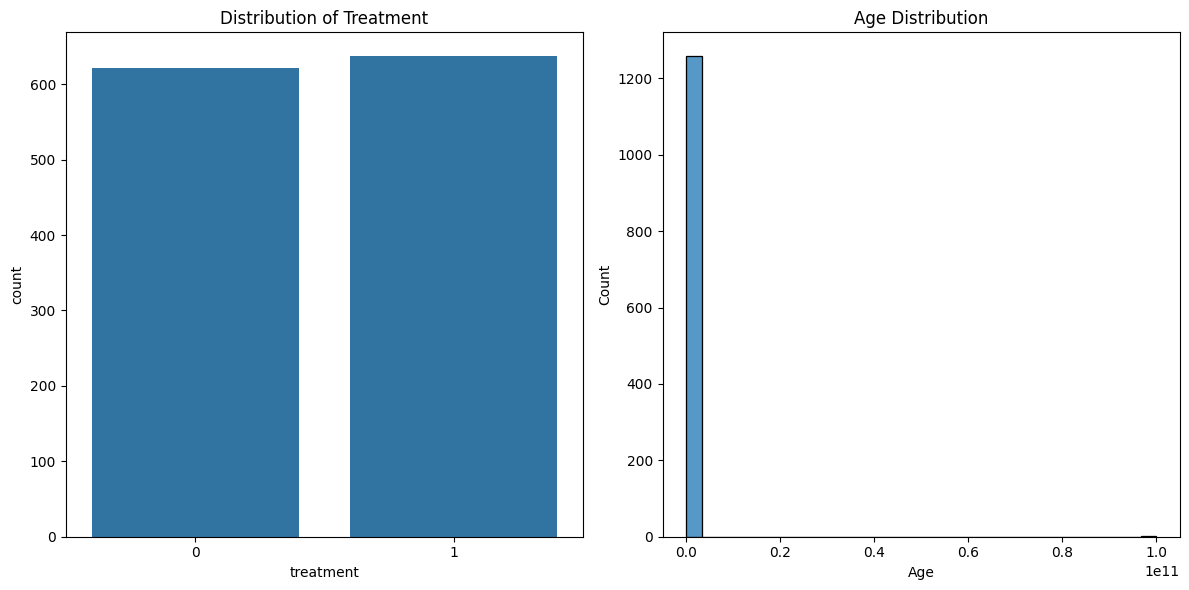

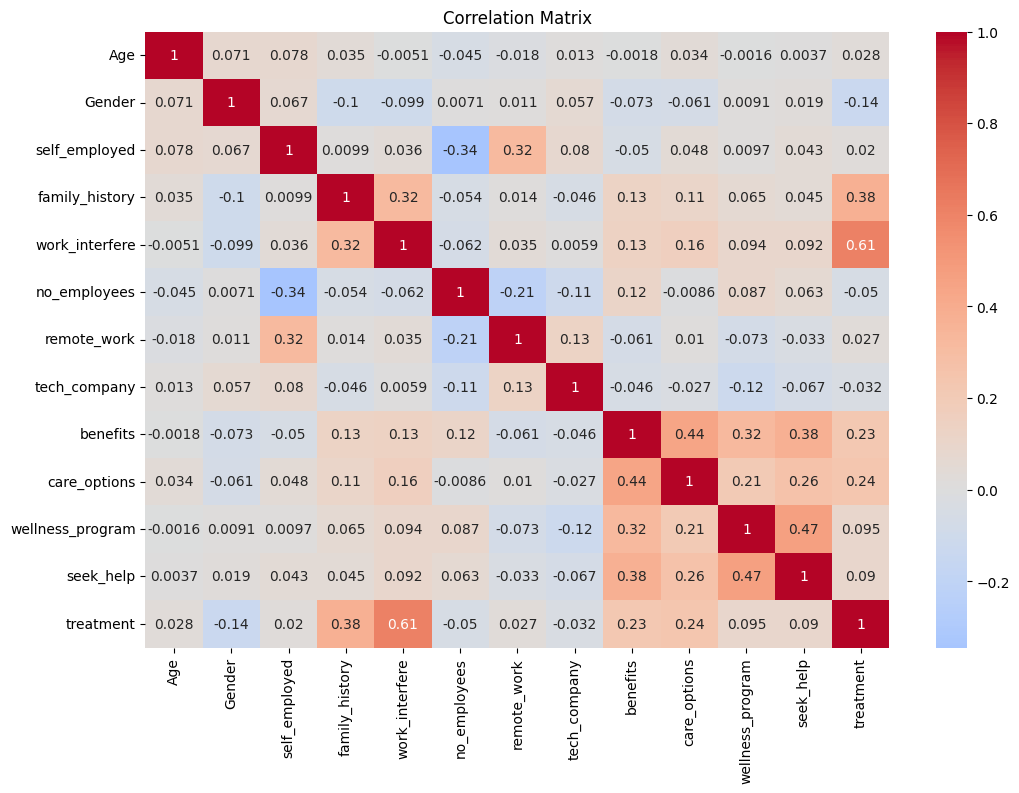

In [7]:
# Treatment distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean, x='treatment')
plt.title('Distribution of Treatment')

# Age distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='Age', bins=30)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       129
           1       0.77      0.83      0.80       123

    accuracy                           0.80       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.80      0.80      0.80       252



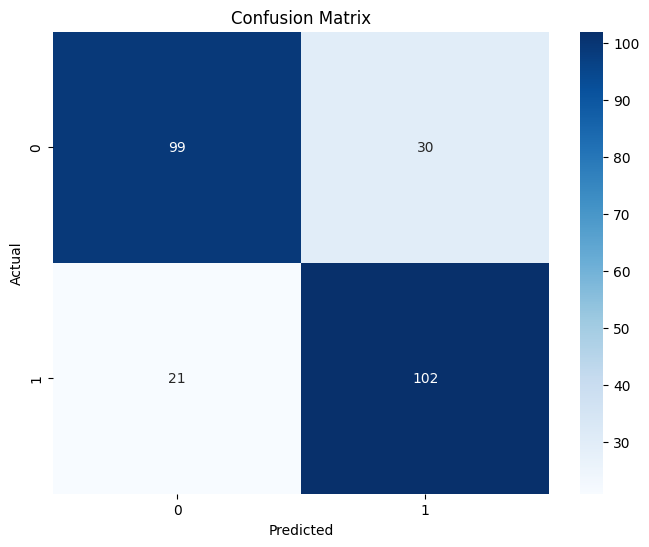

In [8]:
# Separate features and target
X = df_clean.drop('treatment', axis=1)
y = df_clean['treatment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

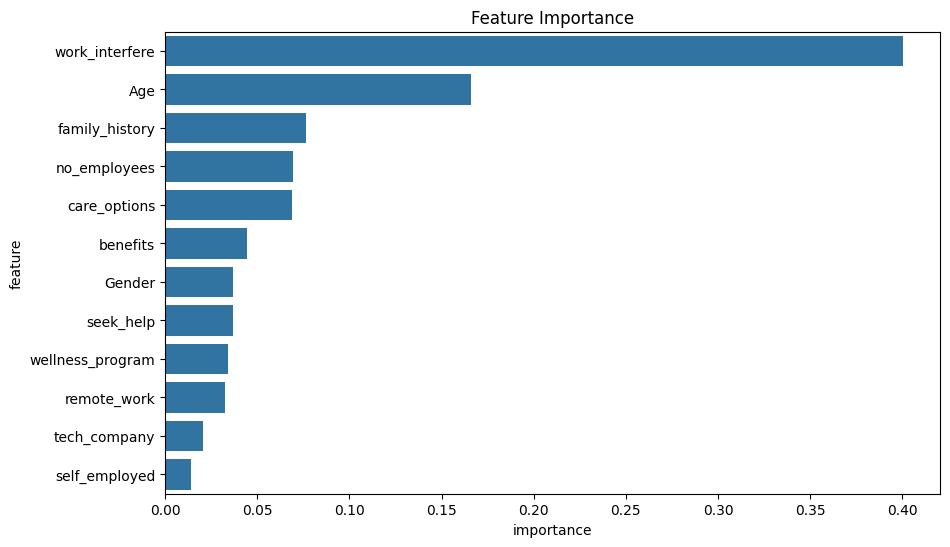

Sample Prediction: No Treatment Needed
Confidence: 90.00%


In [9]:
# Get feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

# Sample prediction
sample_input = X_test.iloc[0].to_frame().T
prediction = model.predict(sample_input)
probability = model.predict_proba(sample_input)

print("Sample Prediction:", "Needs Treatment" if prediction[0] == 1 else "No Treatment Needed")
print("Confidence:", f"{max(probability[0]) * 100:.2f}%")